https://gitlab.com/ronctli1012/blog1-pretrained-alexnet-and-visualization/-/blob/master/alexnet_main.py?ref_type=heads

Testing different pre trained models

# Import

In [1]:
import os
import torch
import torch.nn
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn.functional as F 
import torchvision.utils as utils
import matplotlib.pyplot as plt
import numpy as np 
from PIL import Image
import argparse
import matplotlib.pyplot as plt
import numpy as np
from transformers import AutoImageProcessor, ResNetForImageClassification
import torch

In [3]:
# Define the arguments
class Args:
    def __init__(self):
        self.test_img = 'C:/Users/asche/OneDrive/Skrivebord/invasive_plant_classifier/Model_training_testing/alexnet_images/test_image.jpg'

# Instantiate the args
opt = Args()

"""
data transforms, for pre-processing the input testing image before feeding into the net
"""
data_transforms = transforms.Compose([
    transforms.Resize((224,224)),             # resize the input to 224x224
    transforms.ToTensor(),              # put the input to tensor format
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # normalize the input
    # the normalization is based on images from ImageNet
])

# obtain the file path of the testing image
test_image_dir = './images'
test_image_filepath = os.path.join(test_image_dir, opt.test_img)
#print(test_image_filepath)

# open the testing image
img = Image.open(test_image_filepath)
print("original image's shape: " + str(img.size))

# pre-process the input
transformed_img = data_transforms(img)
print("transformed image's shape: " + str(transformed_img.shape))

original image's shape: (474, 294)
transformed image's shape: torch.Size([3, 224, 224])


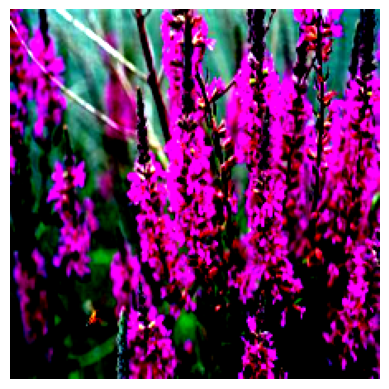

In [4]:
# Convert the tensor image to numpy array
np_img = transformed_img.permute(1, 2, 0).numpy()

# Clip values to [0, 1]
np_img = np.clip(np_img, 0, 1)

# Visualize the image
plt.imshow(np_img)
plt.axis('off')
plt.show()


In [5]:
# form a batch with only one image
batch_img = torch.unsqueeze(transformed_img, 0)
print("image batch's shape: " + str(batch_img.shape))

image batch's shape: torch.Size([1, 3, 224, 224])


## alexnet

In [6]:
# load pre-trained AlexNet model
print("\nfeed the input into the pre-trained alexnet to get the output")
alexnet = models.alexnet(pretrained=True)
# put the model to eval mode for testing
alexnet.eval()

# obtain the output of the model
output = alexnet(batch_img)
print("output vector's shape: " + str(output.shape))


feed the input into the pre-trained alexnet to get the output


c:\Users\asche\anaconda3\envs\ailab\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
c:\Users\asche\anaconda3\envs\ailab\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


output vector's shape: torch.Size([1, 1000])


In [18]:
# Load class names from the file
with open('class_names_ImageNet.txt') as labels:
    classes_alex = [line.strip() for line in labels.readlines()]

# Print the class names
print(classes_alex)

['tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'tiger shark, Galeocerdo cuvieri', 'hammerhead, hammerhead shark', 'electric ray, crampfish, numbfish, torpedo', 'stingray', 'cock', 'hen', 'ostrich, Struthio camelus', 'brambling, Fringilla montifringilla', 'goldfinch, Carduelis carduelis', 'house finch, linnet, Carpodacus mexicanus', 'junco, snowbird', 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 'robin, American robin, Turdus migratorius', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel, dipper', 'kite', 'bald eagle, American eagle, Haliaeetus leucocephalus', 'vulture', 'great grey owl, great gray owl, Strix nebulosa', 'European fire salamander, Salamandra salamandra', 'common newt, Triturus vulgaris', 'eft', 'spotted salamander, Ambystoma maculatum', 'axolotl, mud puppy, Ambystoma mexicanum', 'bullfrog, Rana catesbeiana', 'tree frog, tree-frog', 'tailed frog, bell toad, 

In [19]:
# Apply softmax to convert scores to probabilities
probabilities = F.softmax(output, dim=1)[0]

# Get the index of the class with the highest probability
predicted_class_index = torch.argmax(probabilities).item()

# Map the class index to the corresponding label
predicted_label = classes_alex[predicted_class_index]

# Get the probability of the predicted class
predicted_probability = probabilities[predicted_class_index].item()

print("Predicted class:", predicted_label)
print("Probability:", predicted_probability)

Predicted class: picket fence, paling
Probability: 0.09607412666082382


## resnet

In [25]:
from PIL import Image
import torch
import torchvision.models as models
from transformers import AutoImageProcessor, ResNetForImageClassification

# Path to the image
image_path = './images/test_image.jpg'

# Load the image
image = Image.open(image_path)

# Load the image processor and model
image_processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")

# Process the image
inputs = image_processor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    logits = model(**inputs).logits

# Get the predicted label
predicted_label = logits.argmax(-1).item()

# Print the predicted label
print(model.config.id2label[predicted_label])


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
